<a href="https://colab.research.google.com/github/Jiraporn-klobrat/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

### Generate Data 

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=6)

### Explore Data

In [3]:
X.shape

(500, 2)

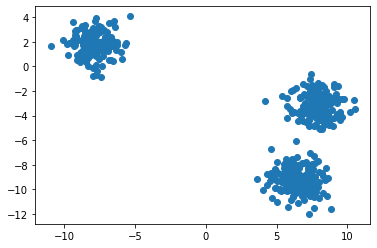

In [4]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [6]:
from sklearn.cluster import KMeans

#### Define

In [8]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [10]:
y_clust = kmeans.fit_predict(X)

In [11]:
y_clust 

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

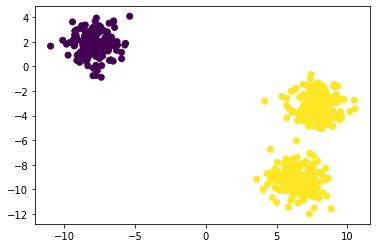

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

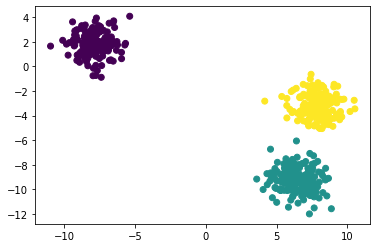

In [13]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

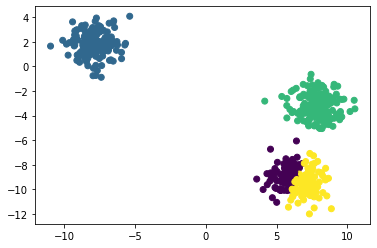

In [14]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

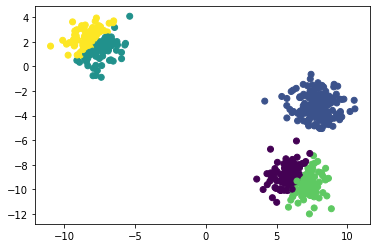

In [20]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

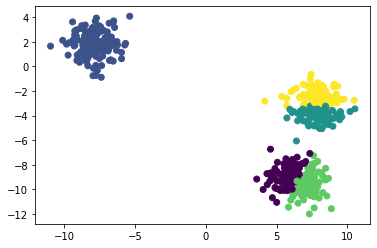

In [17]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

### Example Application (Color Quantization)

In [22]:
import cv2
import os

In [23]:
img = cv2.imread('/content/American_Beaver.jpg')

In [24]:
img.shape

(721, 718, 3)

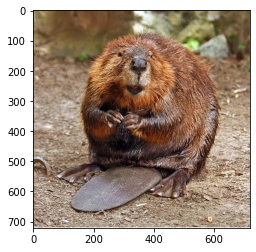

In [25]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [26]:
import numpy as np

In [27]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(106749, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [29]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [30]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(517678, 3)

In [31]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [32]:
centroid = myquantize.cluster_centers_

In [33]:
centroid

array([[102.07133032,  50.1916552 ,  22.13833759],
       [183.07815537, 166.5750162 , 149.63071698],
       [248.29652029, 238.85239723, 225.6527303 ],
       [153.90162121, 131.86252146, 111.49904635],
       [ 58.2113794 ,  31.47055096,  21.71308031],
       [173.06663821, 118.70095502,  83.02336872],
       [118.3923781 ,  96.85234462,  71.94539012],
       [204.67101843, 185.11302062, 166.43654324],
       [226.35180237, 207.62651658, 189.80351277],
       [204.56378009, 152.64211283, 113.77226015],
       [137.66980922, 113.65756341,  91.29187195],
       [ 25.48958381,  10.85631581,   9.56311255],
       [105.37198103,  77.05426427,  50.76833191],
       [142.77008475,  89.68543391,  56.24582445],
       [167.02211865, 148.98384078, 131.25063987],
       [ 79.5251704 ,  58.06507975,  43.41514722]])

แทนสีคืนลงไป

In [34]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


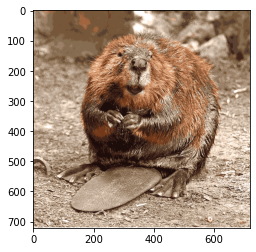

In [40]:
plt.imshow(new_img/225)

In [36]:
plt.imsave('img.jpg',new_img/255)

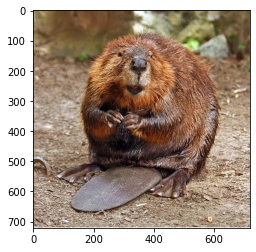

In [38]:
plt.imshow(RGB_img)

### Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

### Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation